In [1]:
%run ../imports.py

In [2]:
import matplotlib.pyplot as plt

In [3]:
import scipy as sp

In [4]:
N = 5
g = get_strongly_connected_digraph(N)

In [5]:
node_list = np.arange(0,N)

In [6]:
A = nx.adjacency_matrix(g, nodelist = node_list)
D = np.diag(np.asarray(np.sum(A, axis=1)).reshape(-1))

In [7]:
a1 = 1
a2 = 2.1961

In [8]:
L = a1*D - a2*A

In [9]:
v,e = np.linalg.eig(L)

In [10]:
v

array([-3.7736+0.j    ,  2.8968+3.0888j,  2.8968-3.0888j,  3.3916+0.j    ,
        2.    +0.j    ])

In [11]:
np.asarray(e[4])

array([[-0.3894+0.j   ,  0.1242-0.257j,  0.1242+0.257j,  0.2913+0.j   ,
         0.7172+0.j   ]])

In [12]:
init = 1 + np.random.rand(N)

In [13]:
f1 = lambda t,x: np.asarray(-a1*D.dot(x)+ A.dot(a2*x))
f2 = lambda t,x: np.asarray(-L.dot(x))[0]

In [14]:
res = sp.integrate.solve_ivp(fun=f1, t_span=[0,50], y0 = init)

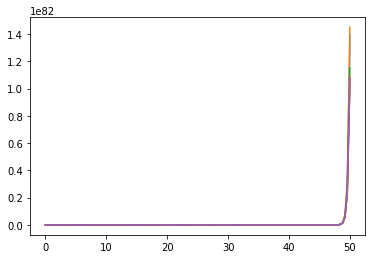

In [15]:
for i in range(0,N):
    plt.plot(res.t[:], res.y[i,:])

In [16]:
np.divide(res.y[:,-1], np.asarray(e[3]))

array([[-3.5717e+82-0.0000e+00j,  2.2091e+82+4.5725e+82j,
         1.7549e+82-3.6324e+82j,  3.7097e+82+0.0000e+00j,
        -2.1926e+82-0.0000e+00j]])

In [17]:
sp.linalg.null_space(L)

array([], shape=(5, 0), dtype=float64)